In [37]:
import numpy as np
from scipy.io import loadmat 
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

In [6]:
HW4=loadmat("/Users/albertzhang/Desktop/18spring/AML/HW/HW_4/annthyroid.mat")

In [46]:
HW4.keys()

dict_keys(['y', '__version__', '__header__', 'X', '__globals__'])

In [47]:
data=pd.DataFrame(HW4['X'])
target=pd.DataFrame(HW4['y'])

In [ ]:
Y=HW4['y']
Y=Y.tolist()
y=[]
for l in Y:
    y.append(l[0])
target=y

# Problem 1

Visualize the univariate distributions of all features

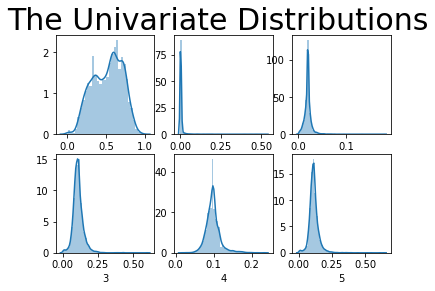

In [50]:
import seaborn as sns

plt.subplot(2, 3, 1)
sns.distplot(data.iloc[:,0])
plt.subplot(2, 3, 2)
sns.distplot(data.iloc[:,1])
plt.subplot(2, 3, 3)
sns.distplot(data.iloc[:,2])
plt.subplot(2, 3, 4)
sns.distplot(data.iloc[:,3])
plt.subplot(2, 3, 5)
sns.distplot(data.iloc[:,4])
plt.subplot(2, 3, 6)
sns.distplot(data.iloc[:,5])
plt.suptitle("The Univariate Distributions", fontsize=30)
plt.show()

PCA for Visualization

(7200, 6)
(7200, 2)


Text(0,0.5,'second principal component')

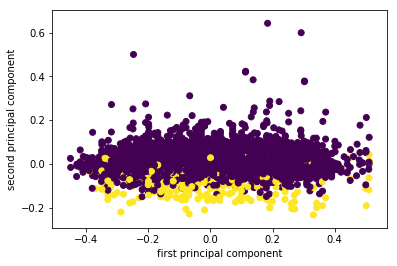

In [67]:
from sklearn.decomposition import PCA
print(data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
print(X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")


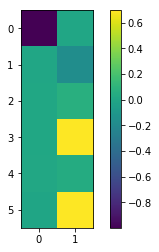

In [69]:
components = pca.components_
plt.imshow(components.T)
plt.colorbar()
plt.show()

Text(0,0.5,'cumulative explained variance')

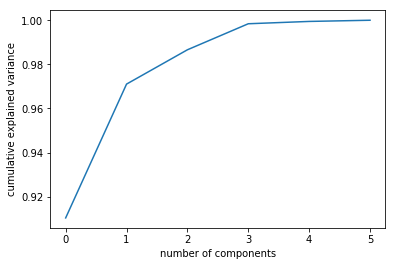

In [70]:
pca_var = PCA().fit(data)
plt.plot(np.cumsum(pca_var.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From the variance ratio graph, 2 components retain 98% of the variance.

Text(0,0.5,'second principal component')

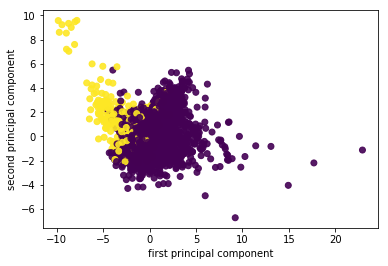

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_scaled_com = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled_com.fit_transform(data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

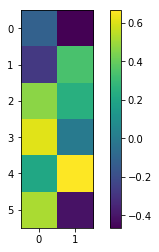

In [53]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)

plt.colorbar()

Text(0.5,1,'Variance Ratio Graph')

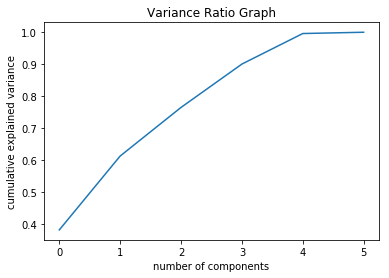

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
pca_var2 = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca_var2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance Ratio Graph with scaling')

From the variance ratio with scaling graph, 3 components retain 90% of the variance.

Visualize the data using t-SNE

Text(0,0.5,'second principal component')

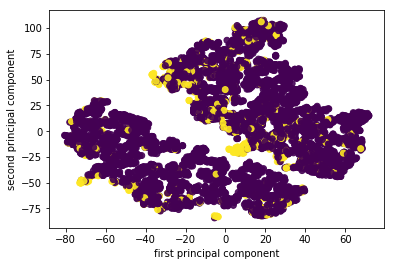

In [84]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE with 2 components and tune the perplexity parameter equal to 2

Text(0,0.5,'second principal component')

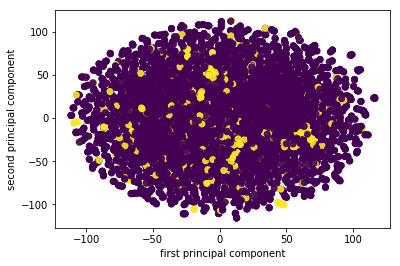

In [85]:
X_tsne = TSNE(n_components=2,perplexity=2).fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE with 2 components and tune the perplexity parameter equal to 30

Text(0,0.5,'second principal component')

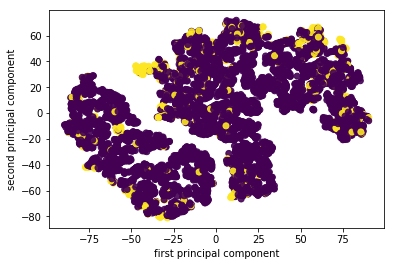

In [87]:
X_tsne = TSNE(n_components=2,perplexity=30).fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE with 2 components and tune the perplexity parameter equal to 50

Text(0,0.5,'second principal component')

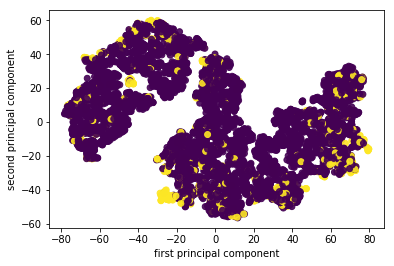

In [88]:
X_tsne = TSNE(n_components=2,perplexity=50).fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE with 2 components and tune the perplexity parameter equal to 300

Text(0,0.5,'second principal component')

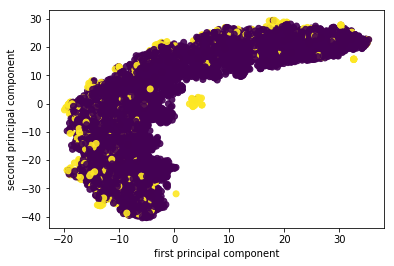

In [89]:
X_tsne = TSNE(n_components=2,perplexity=300).fit_transform(data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE scaling with 2 components

Text(0,0.5,'second principal component')

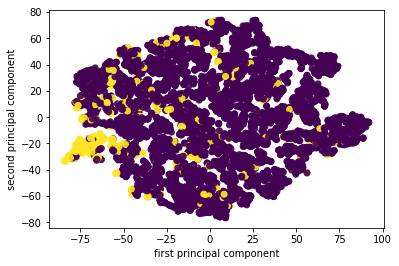

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2))
X_tsne_scaled = tsne_scaled.fit_transform(data)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE scaling with 2 components and tune the perplexity parameter equal to 2

Text(0,0.5,'second principal component')

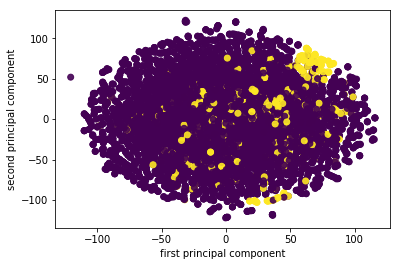

In [90]:
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,perplexity=2))
X_tsne_scaled = tsne_scaled.fit_transform(data)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE scaling with 2 components and tune the perplexity parameter equal to 30

Text(0,0.5,'second principal component')

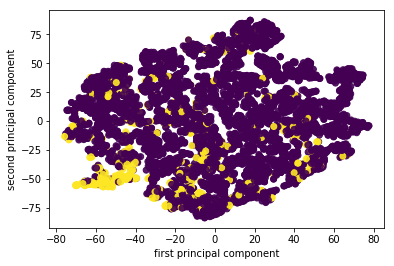

In [91]:
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,perplexity=30))
X_tsne_scaled = tsne_scaled.fit_transform(data)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE scaling with 2 components and tune the perplexity parameter equal to 50

Text(0,0.5,'second principal component')

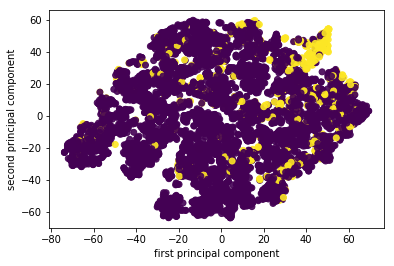

In [92]:
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,perplexity=50))
X_tsne_scaled = tsne_scaled.fit_transform(data)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

t-SNE scaling with 2 components and tune the perplexity parameter equal to 300

Text(0,0.5,'second principal component')

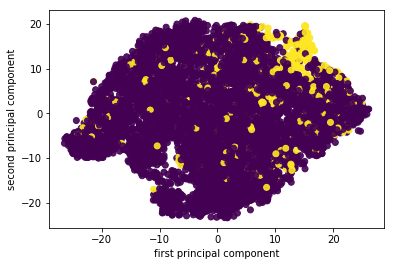

In [93]:
tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,perplexity=300))
X_tsne_scaled = tsne_scaled.fit_transform(data)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

From T-sne with and without scaling, we can see that using T-sne is not good to obtain a better visualization

# Problem 2

# Problem 3

## 3.1

Assume the proportion of outliers is 10%.

In [7]:
X=HW4['X']
y=HW4['y']
X_tsne = TSNE().fit_transform(X)

### Elliptic Envelope

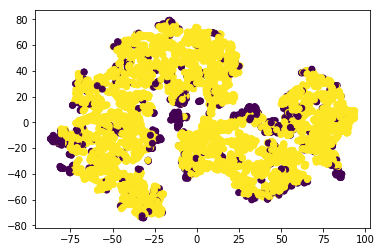

In [9]:
ee = EllipticEnvelope(contamination=.1).fit(X)
pred_ee = ee.predict(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=pred_ee)
plt.show()

### One Class SVM

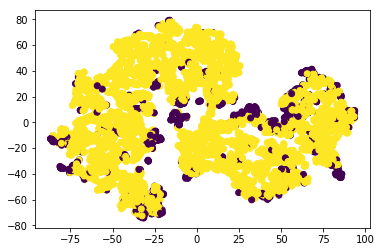

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
oneclass = OneClassSVM(nu=.1).fit(X_scaled)
pred_oneclass = oneclass.predict(X_scaled)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=pred_oneclass)
plt.show()

### Isolation Forest

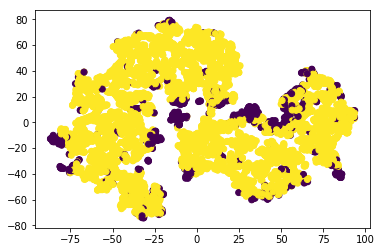

In [11]:
isf = IsolationForest().fit(X)
pred_isf = isf.predict(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=pred_isf)
plt.show()

From above plots, One Class SVM might have best perfermance since less predicted outliers appearing in the middle of class.

## 3.2 

## Using AUC and average precision to evaluate the different outlier detection approaches

### Elliptic Envelope

In [46]:
ap_ee = average_precision_score(y, -ee.decision_function(X))
ee_auc = roc_auc_score(y, -ee.decision_function(X))
ee_ari = adjusted_rand_score(y[:,0], pred_ee)
ee_nmi = normalized_mutual_info_score(y[:,0], pred_ee)

print("Average precision of Elliptic Envelope: {:.3f}".format(ap_ee))
print("AUC for Elliptic Envelope: {:.3f}".format(ee_auc))
print("ARI for Elliptic Envelope: {:.3f}".format(ee_ari))
print("NMI for Elliptic Envelope: {:.3f}".format(ee_nmi))

Average precision of Elliptic Envelope: 0.504
AUC for Elliptic Envelope: 0.919
ARI for Elliptic Envelope: 0.351
NMI for Elliptic Envelope: 0.167


### One Class SVM

In [47]:
ap_oneclass = average_precision_score(y, -oneclass.decision_function(X))
oneclass_auc = roc_auc_score(y, -oneclass.decision_function(X))
oneclass_ari = adjusted_rand_score(y[:,0], pred_oneclass)
oneclass_nmi = normalized_mutual_info_score(y[:,0], pred_oneclass)

print("Average precision of One Class SVM: {:.3f}".format(ap_oneclass))
print("AUC for One Class SVM: {:.3f}".format(oneclass_auc))
print("ARI for One Class SVM: {:.3f}".format(oneclass_ari))
print("NMI for One Class SVM: {:.3f}".format(oneclass_nmi))

Average precision of One Class SVM: 0.080
AUC for One Class SVM: 0.517
ARI for One Class SVM: 0.145
NMI for One Class SVM: 0.038


### Isolation Forest

In [48]:
ap_isf = average_precision_score(y, -isf.decision_function(X))
isf_auc = roc_auc_score(y, -isf.decision_function(X))
isf_ari = adjusted_rand_score(y[:,0], pred_isf)
isf_nmi = normalized_mutual_info_score(y[:,0], pred_isf)

print("Average precision of Isolation Forest: {:.3f}".format(ap_isf))
print("AUC for Isolation Forest: {:.3f}".format(isf_auc))
print("ARI for One Class Isolation Forest: {:.3f}".format(isf_ari))
print("NMI for One Class Isolation Forest: {:.3f}".format(isf_nmi))

Average precision of Isolation Forest: 0.279
AUC for Isolation Forest: 0.787
ARI for One Class Isolation Forest: 0.207
NMI for One Class Isolation Forest: 0.069


Compared with clustering approaches in task2 by ARI and NMI, all three models are better.

# Problem 4

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

### Undersampling

In [24]:
lr_undersample_pipe = make_imb_pipeline(RandomUnderSampler(), StandardScaler(), LogisticRegression())
lr_scores = cross_validate(lr_undersample_pipe,X_train, y_train, cv=10, scoring=('roc_auc', 'average_precision'))
rf_undersample_pipe = make_imb_pipeline(RandomUnderSampler(),RandomForestClassifier())
rf_scores = cross_validate(rf_undersample_pipe, X_train, y_train, cv=10, scoring=('roc_auc', 'average_precision'))

print('Logistic Regression AUC:{:.3f} Average Precision:{:.3f}'.format(lr_scores['test_roc_auc'].mean(), lr_scores['test_average_precision'].mean()))
print('Random Forest Classifier AUC:{:.3f} Average Precision:{:.3f}'.format(rf_scores['test_roc_auc'].mean(), rf_scores['test_average_precision'].mean()))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

Logistic Regression AUC:0.952 Average Precision:0.696
Random Forest Classifier AUC:0.991 Average Precision:0.817


### Oversampling

In [33]:
lr_oversample_pipe = make_imb_pipeline(RandomOverSampler(), StandardScaler(), LogisticRegression())
lr_scores = cross_validate(lr_oversample_pipe,X_train, y_train, cv=10, scoring=('roc_auc', 'average_precision'))
rf_oversample_pipe = make_imb_pipeline(RandomOverSampler(),RandomForestClassifier())
rf_scores = cross_validate(rf_oversample_pipe, X_train, y_train, cv=10, scoring=('roc_auc', 'average_precision'))

print('Logistic Regression AUC:{:.3f} Average Precision:{:.3f}'.format(lr_scores['test_roc_auc'].mean(), lr_scores['test_average_precision'].mean()))
print('Random Forest Classifier AUC:{:.3f} Average Precision:{:.3f}'.format(rf_scores['test_roc_auc'].mean(), rf_scores['test_average_precision'].mean()))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

Logistic Regression AUC:0.987 Average Precision:0.817
Random Forest Classifier AUC:0.994 Average Precision:0.886


/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1. Based on the above results, select oversampling method. 
2. Compare above results with the outlier detection in terms of AUC and average precision, using LogisticRegression and RandomForestClassifier is better.

## Tune Parameter

### Logistic Regression_Oversampling_GridSearch

In [31]:
para_grid_lr={'logisticregression__C':[0.01,0.1,1,10,100]}
grid_lr = GridSearchCV(lr_oversample_pipe, para_grid_lr)
grid_lr.fit(X_train,y_train)

lr_auc_grid = roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:, 1])
ap_lr_grid = average_precision_score(y_test, grid_lr.predict_proba(X_test)[:, 1])

print('best parameters for Logistic Regression: {}'.format(grid_lr.best_params_))
print("AUC for Logistic Regression: {:.3f}".format(lr_auc_grid))
print("Average precision of Logistic Regression: {:.3f}".format(ap_lr_grid))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

best parameters for Logistic Regression: {'logisticregression__C': 10}
AUC for Logistic Regression: 0.991
Average precision of Logistic Regression: 0.847


/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest_Oversampling_GridSearch

In [34]:
para_grid_rf={'randomforestclassifier__max_depth': [2, 4, 8, 16], 'randomforestclassifier__n_estimators': [10, 50, 100]}
grid_rf = GridSearchCV(rf_oversample_pipe,para_grid_rf)
grid_rf.fit(X_train,y_train)

rf_auc_grid = roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
ap_rf_grid = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])

print('best parameters for Random Forest Classifer: {}'.format(grid_rf.best_params_))
print("AUC for Random Forest Classifier: {:.3f}".format(rf_auc_grid))
print("Average precision of Random Forest Classifier: {:.3f}".format(ap_rf_grid))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

best parameters for Random Forest Classifer: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__n_estimators': 100}
AUC for Random Forest Classifier: 0.995
Average precision of Random Forest Classifier: 0.922


#### changing the class-weight to “balanced”

### Logistic Regression_Oversampling_GridSearch_Balanced

In [35]:
lr_oversample_pipe_bal = make_imb_pipeline(RandomOverSampler(), StandardScaler(), LogisticRegression(class_weight='balanced'))
para_grid_lr={'logisticregression__C':[0.01,0.1,1,10,100]}
grid_lr = GridSearchCV(lr_oversample_pipe_bal, para_grid_lr)
grid_lr.fit(X_train,y_train)

lr_auc_grid = roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:, 1])
ap_lr_grid = average_precision_score(y_test, grid_lr.predict_proba(X_test)[:, 1])

print('best parameters for Logistic Regression: {}'.format(grid_lr.best_params_))
print("AUC for Logistic Regression: {:.3f}".format(lr_auc_grid))
print("Average precision of Logistic Regression: {:.3f}".format(ap_lr_grid))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

best parameters for Logistic Regression: {'logisticregression__C': 100}
AUC for Logistic Regression: 0.991
Average precision of Logistic Regression: 0.841


/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

### Random Forest_Oversampling_GridSearch_Balanced

In [36]:
rf_oversample_pipe_bal = make_imb_pipeline(RandomOverSampler(),RandomForestClassifier(class_weight='balanced'))
para_grid_rf={'randomforestclassifier__max_depth': [2, 4, 8, 16], 'randomforestclassifier__n_estimators': [10, 50, 100]}
grid_rf = GridSearchCV(rf_oversample_pipe_bal,para_grid_rf)
grid_rf.fit(X_train,y_train)

rf_auc_grid = roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:, 1])
ap_rf_grid = average_precision_score(y_test, grid_rf.predict_proba(X_test)[:, 1])

print('best parameters for Random Forest Classifer: {}'.format(grid_rf.best_params_))
print("AUC for Random Forest Classifier: {:.3f}".format(rf_auc_grid))
print("Average precision of Random Forest Classifier: {:.3f}".format(ap_rf_grid))

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

best parameters for Random Forest Classifer: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__n_estimators': 100}
AUC for Random Forest Classifier: 0.996
Average precision of Random Forest Classifier: 0.930


According to the results, changing the class weight nearly doesn't help.